# Activity 1: Analyze Surface Air Temperature

### Please download the ERA5 2-meter air temperature dataset from the following Google Drive link:

[Download ERA5 Data](https://drive.google.com/file/d/1Pih7qu0XUHOlPFUeKRMoiXFaWE2m_Y0G/view?usp=drive_link)

And then move this data to your directory for this course


In [1]:
# Import Python libraries for data analysis, plotting, and mapping
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [2]:
#print working directory; Equivalent to running pwd in a terminal.
! pwd

/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course


In [3]:
# Define and open a NetCDF dataset using xarray
ds_t2m = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.t2m.194001-202507.nc")

In [4]:
#show information about this dataset
ds_t2m

<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 1027, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01 ... 2025-07-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 16kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-13T00:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
# Rename coordinates to shorter names for later analysis
ds_t2m = ds_t2m.rename({
    'valid_time': 'time',
    'latitude': 'lat',
    'longitude': 'lon'
})

# Extract the 2-meter temperature variable
t2m = ds_t2m['t2m']

# Display the DataArray
t2m

<xarray.DataArray 't2m' (time: 1027, lat: 721, lon: 1440)> Size: 4GB
[1066272480 values with dtype=float32]
Coordinates:
    number   int64 8B ...
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2025-07-01
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    expver   (time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [6]:
 #convert K to °C
t2m = t2m - 273.15 

## Section 1 Climatology of global near-surface air tempeature (T2m) during 1940–present

In [7]:
# Compute annual mean
annual_mean_t2m = t2m.groupby('time.year').mean(dim='time').mean(dim='year')

# Compute seasonal mean climatology
seasonal_mean_t2m = t2m.groupby('time.season').mean(dim='time')

# Define order of seasons
seasons_order = ['DJF', 'MAM', 'JJA', 'SON']
seasonal_mean_t2m = seasonal_mean_t2m.sel(season=seasons_order)

In [8]:
annual_mean_t2m

<xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
array([[-14.884449, -14.884449, -14.884449, ..., -14.884449, -14.884449,
        -14.884449],
       [-14.872661, -14.872485, -14.872358, ..., -14.873154, -14.87296 ,
        -14.87286 ],
       [-14.823829, -14.823466, -14.823062, ..., -14.824961, -14.824676,
        -14.824312],
       ...,
       [-45.185715, -45.18483 , -45.1831  , ..., -45.188267, -45.18678 ,
        -45.185837],
       [-45.29598 , -45.294704, -45.293446, ..., -45.29805 , -45.297386,
        -45.29668 ],
       [-45.832115, -45.832115, -45.832115, ..., -45.832115, -45.832115,
        -45.832115]], shape=(721, 1440), dtype=float32)
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

In [9]:
seasonal_mean_t2m

<xarray.DataArray 't2m' (season: 4, lat: 721, lon: 1440)> Size: 17MB
array([[[-26.58761   , -26.58761   , -26.58761   , ..., -26.58761   ,
         -26.58761   , -26.58761   ],
        [-26.519258  , -26.519022  , -26.518831  , ..., -26.519964  ,
         -26.519676  , -26.519585  ],
        [-26.409647  , -26.409184  , -26.408659  , ..., -26.411282  ,
         -26.41078   , -26.410324  ],
        ...,
        [-31.28752   , -31.28755   , -31.287367  , ..., -31.287071  ,
         -31.28688   , -31.287003  ],
        [-31.413925  , -31.413736  , -31.413599  , ..., -31.414146  ,
         -31.414085  , -31.41401   ],
        [-31.718864  , -31.718864  , -31.718864  , ..., -31.718864  ,
         -31.718864  , -31.718864  ]],

       [[-18.320126  , -18.320126  , -18.320126  , ..., -18.320126  ,
         -18.320126  , -18.320126  ],
        [-18.315575  , -18.315447  , -18.315393  , ..., -18.315863  ,
         -18.315773  , -18.315674  ],
        [-18.26601   , -18.265882  , -18.26567   , ..., -18.266768  ,
         -18.266548  , -18.266314  ],
...
         -53.64698   , -53.64508   ],
        [-53.759464  , -53.757404  , -53.75539   , ..., -53.763023  ,
         -53.761852  , -53.76062   ],
        [-54.478893  , -54.478893  , -54.478893  , ..., -54.478893  ,
         -54.478893  , -54.478893  ]],

       [[-14.933359  , -14.933359  , -14.933359  , ..., -14.933359  ,
         -14.933359  , -14.933359  ],
        [-14.945974  , -14.945652  , -14.945338  , ..., -14.947107  ,
         -14.9466715 , -14.946387  ],
        [-14.9112625 , -14.910535  , -14.909768  , ..., -14.913706  ,
         -14.913085  , -14.912235  ],
        ...,
        [-45.65644   , -45.656136  , -45.654903  , ..., -45.65736   ,
         -45.656433  , -45.65602   ],
        [-45.69558   , -45.694637  , -45.693665  , ..., -45.697075  ,
         -45.696583  , -45.69614   ],
        [-46.146126  , -46.146126  , -46.146126  , ..., -46.146126  ,
         -46.146126  , -46.146126  ]]],
      shape=(4, 721, 1440), dtype=float32)
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * season   (season) object 32B 'DJF' 'MAM' 'JJA' 'SON'

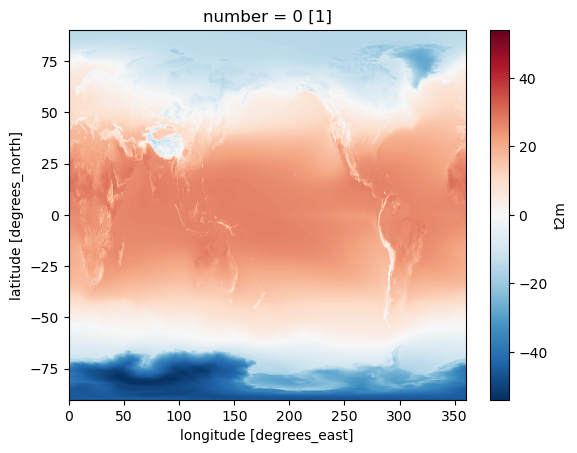

In [10]:
# xarray provides a convenient wrapper around Matplotlib for quick plotting.
# Additional settings to improve the plot will be shown in the next cell.
annual_mean_t2m.plot()

In [11]:
vmin = -32.
vmax = 34.
contour_interval = 2.
def plot_sst(ax, sst, cmap="RdBu_r", levels=np.arange(vmin, vmax, contour_interval)):
    """
    Plot sea surface temperature (SST) on a given axis with contour fill only.

    Parameters:
        ax     : matplotlib axis with a Cartopy projection
        sst    : xarray DataArray of SST
        cmap   : colormap name (default: "RdBu_r")
        levels : contour levels for filled contours
    """
    # Add cyclic point to wrap longitude around the globe
    sst_cyclic, lon_cyclic = add_cyclic_point(sst.values, coord=sst.lon)

    # Contour-filled SST plot
    mappable = ax.contourf(
        lon_cyclic, sst.lat, sst_cyclic,
        transform=ccrs.PlateCarree(),
        cmap=cmap, levels=levels, extend='both'
    )

    # Full global extent
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    # Coastlines
    ax.add_feature(cfeature.COASTLINE)

    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=8, length=1)

    # Tick locations
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

    # Formatters for longitude and latitude
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # Hide axis labels to keep plots clean
    ax.set_xlabel('')
    ax.set_ylabel('')

    return mappable

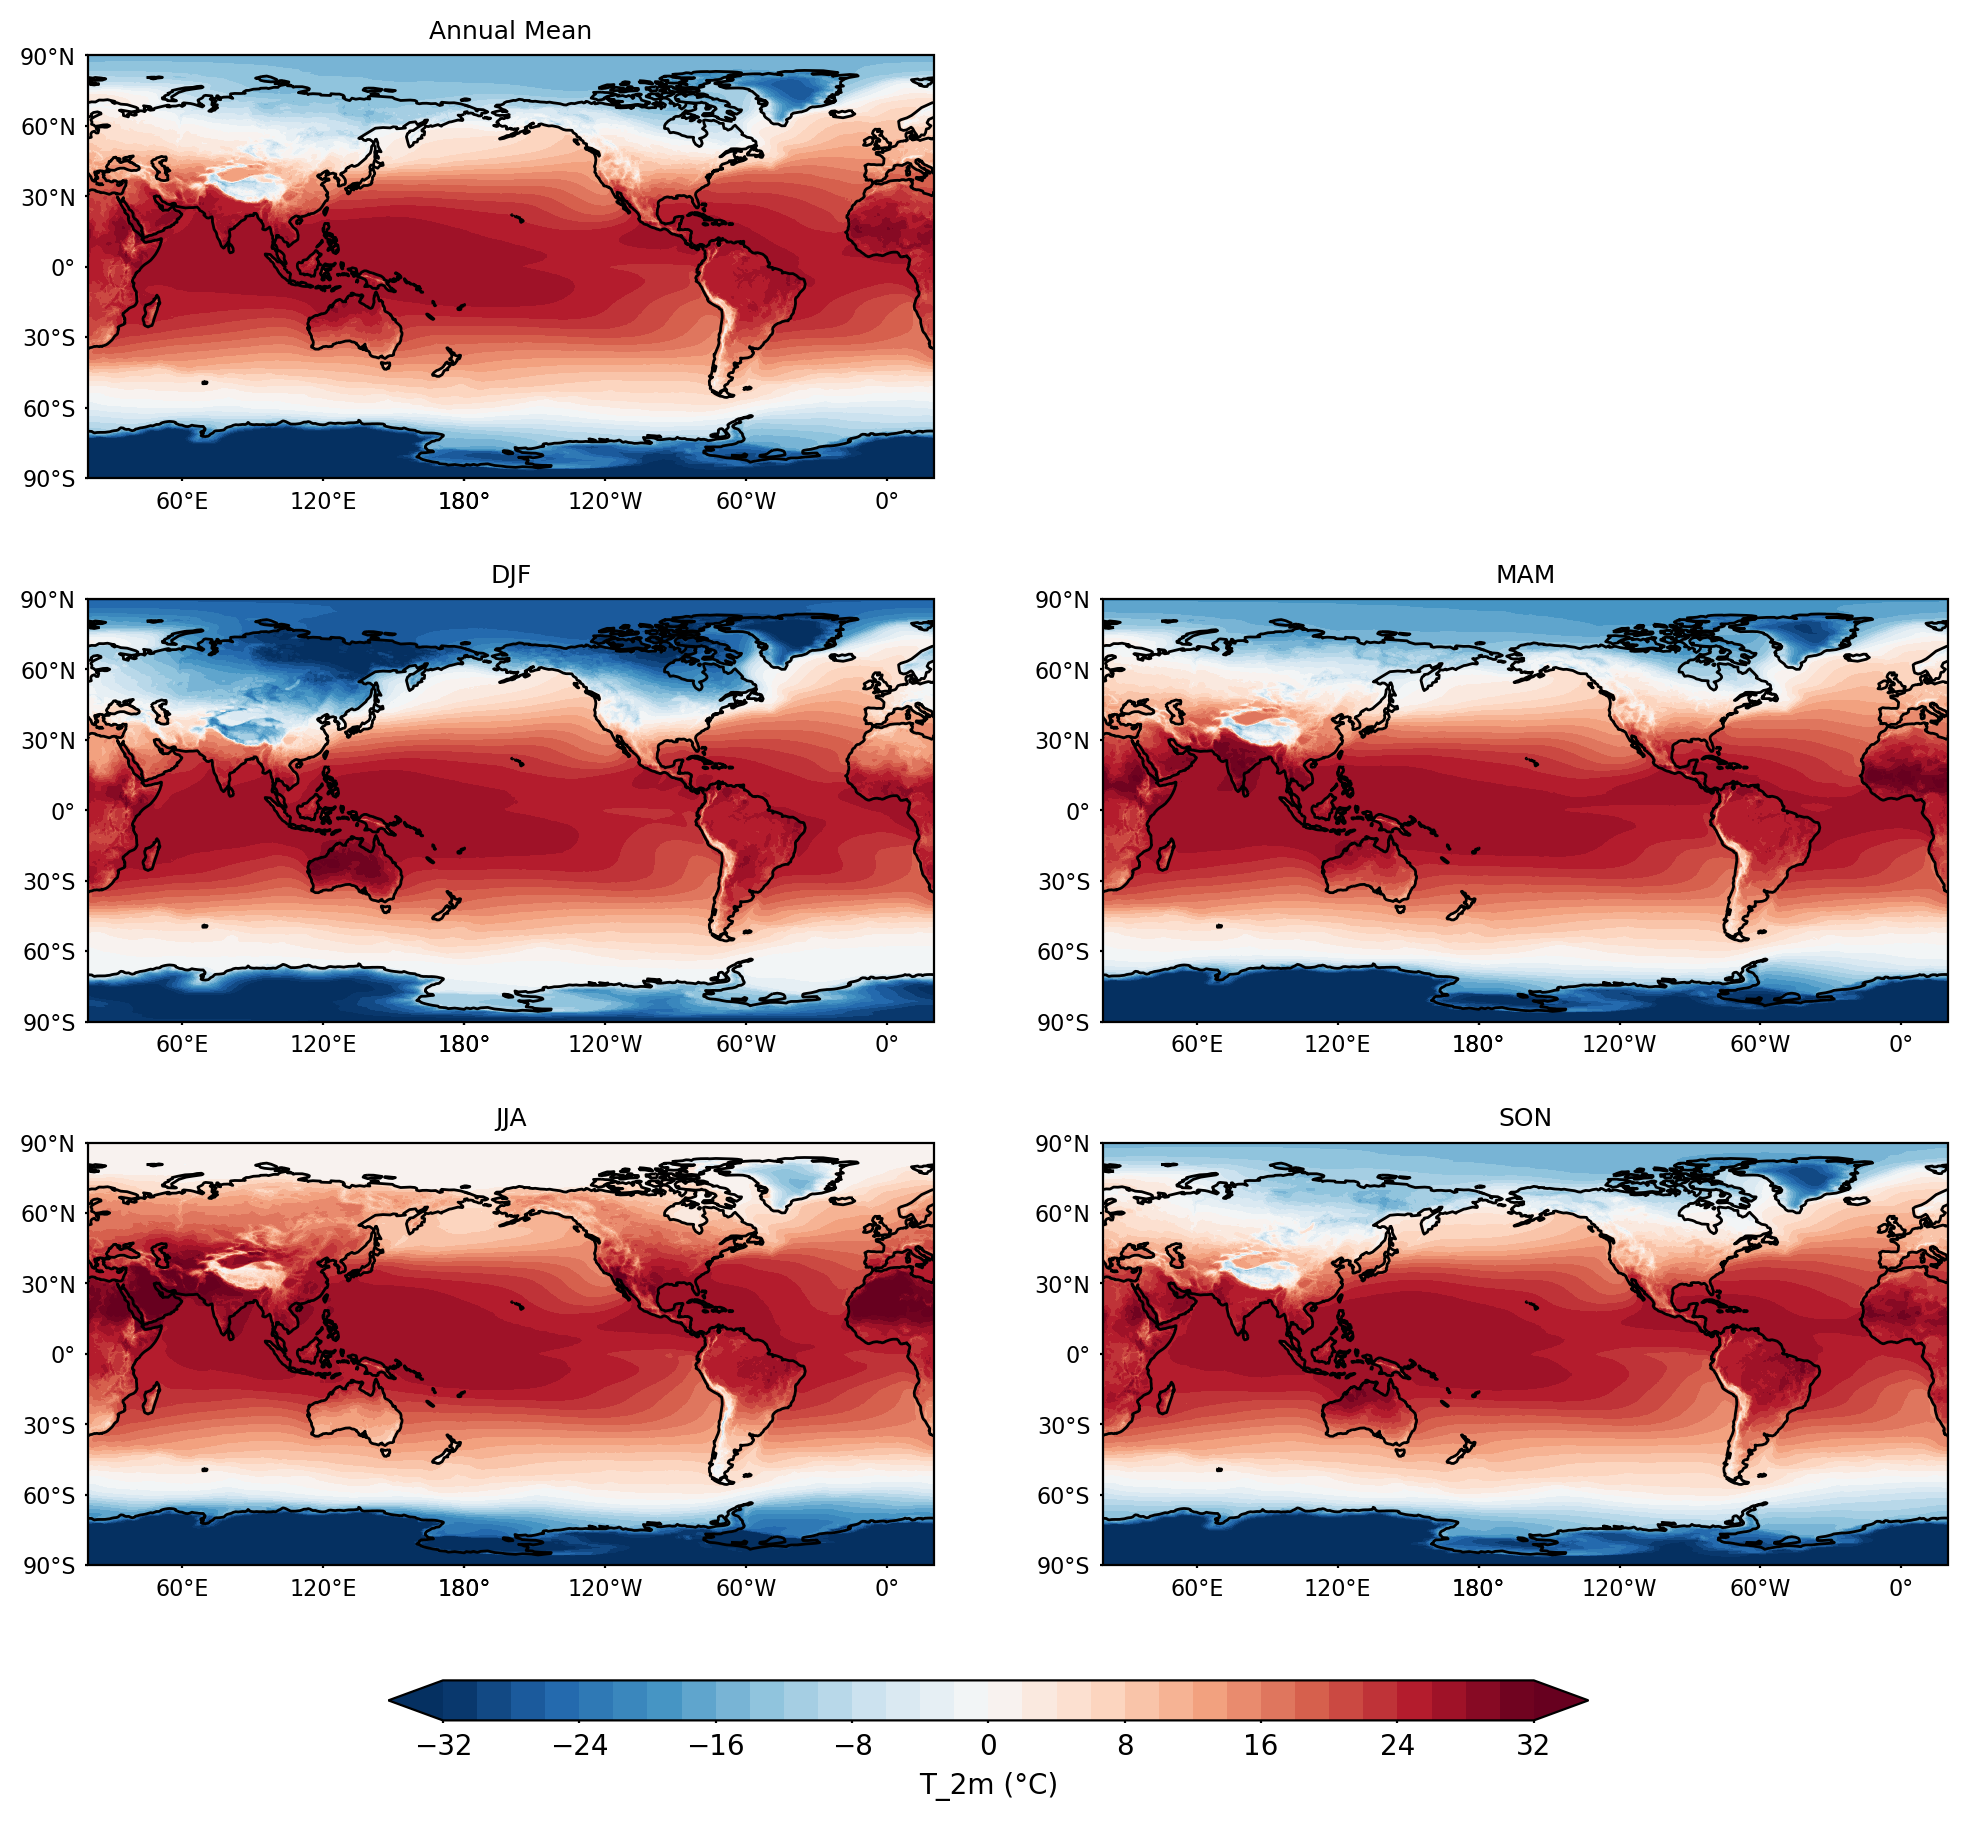

In [12]:
# Create figure layout (3 rows × 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160)}, dpi=200)

# Annual mean in the top-left subplot
mappable = plot_sst(axes[0, 0], annual_mean_t2m)
axes[0, 0].set_title('Annual Mean', fontsize=9)
axes[0, 1].remove()  # Remove unused subplot


# Seasonal means in remaining positions
for i, season in enumerate(seasons_order):
    row = i // 2 + 1
    col = i % 2
    mappable = plot_sst(axes[row, col], seasonal_mean_t2m.sel(season=season))
    axes[row, col].set_title(season, fontsize=9)
# Shared colorbar at the bottom
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
fig.colorbar(mappable, cax=cbar_ax, label='T_2m (°C)', orientation='horizontal')
cbar_ax.tick_params(which='both', length=1)

## Section 2 Example: T2m near Dallas, TX

In [13]:
dallas_lat = 32.7767
dallas_lon = -96.7970

# Select the grid point nearest to Dallas
t2m_dallas = t2m.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')

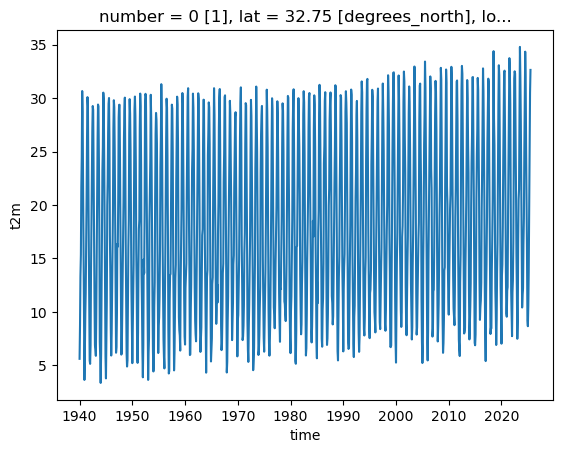

In [14]:
t2m_dallas.plot()

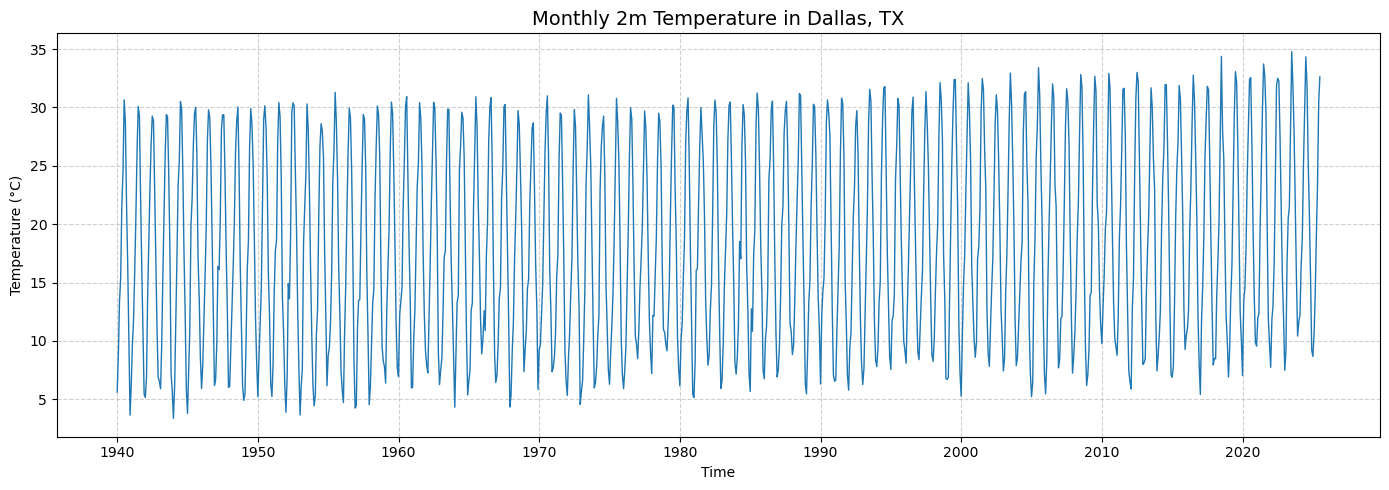

In [15]:
# Plot monthly time series and make it nicer
plt.figure(figsize=(14, 5))
t2m_dallas.plot(color='tab:blue', linewidth=1)
plt.title('Monthly 2m Temperature in Dallas, TX', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
# Compute monthly climatology
t2m_monclim = t2m_dallas.groupby('time.month').mean('time')
t2m_monclim

<xarray.DataArray 't2m' (month: 12)> Size: 48B
array([ 6.9555216,  9.255982 , 12.766759 , 16.512747 , 21.480562 ,
       27.081236 , 30.887499 , 30.047367 , 24.994347 , 18.408798 ,
       12.042634 ,  7.6915183], dtype=float32)
Coordinates:
    number   int64 8B ...
    lat      float64 8B 32.75
    lon      float64 8B 0.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

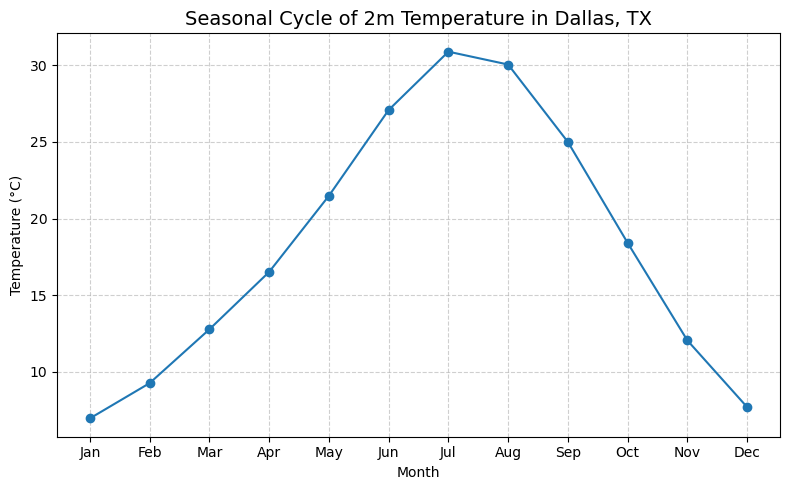

In [17]:
# Plot seasonal cycle
plt.figure(figsize=(8, 5))
plt.plot(t2m_monclim['month'], t2m_monclim, marker='o', color='tab:blue')
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Cycle of 2m Temperature in Dallas, TX', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [18]:
# Calculate anomaly by subtracting the monthly climatology from each time point
t2m_dallas_monanom = t2m_dallas.groupby('time.month') - t2m_monclim
t2m_dallas_monanom

<xarray.DataArray 't2m' (time: 1027)> Size: 4kB
array([-1.3395853 , -0.47979832,  0.5763502 , ...,  1.8489361 ,
        3.4184895 ,  1.7427807 ], shape=(1027,), dtype=float32)
Coordinates:
    number   (time) int64 8kB 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2025-07-01
    lat      (time) float64 8kB 32.75 32.75 32.75 32.75 ... 32.75 32.75 32.75
    lon      (time) float64 8kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    expver   (time) <U4 16kB '0001' '0001' '0001' ... '0001' '0005' '0005'
    month    (time) int64 8kB 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7

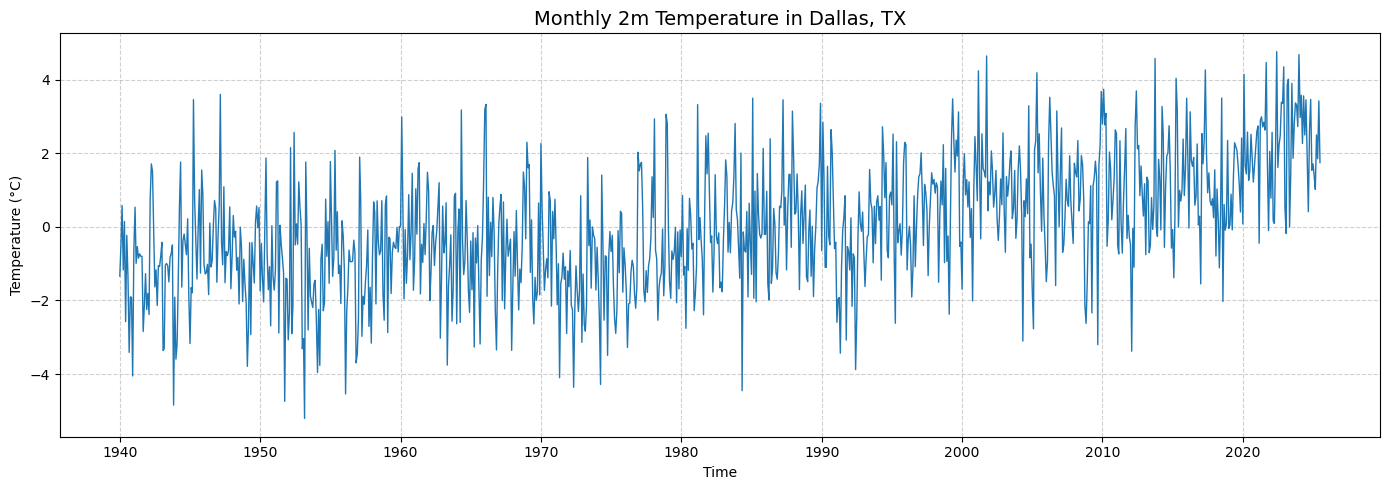

In [19]:
# Plot monthly time series
plt.figure(figsize=(14, 5))
t2m_dallas_monanom.plot(color='tab:blue', linewidth=1)
plt.title('Monthly 2m Temperature in Dallas, TX', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

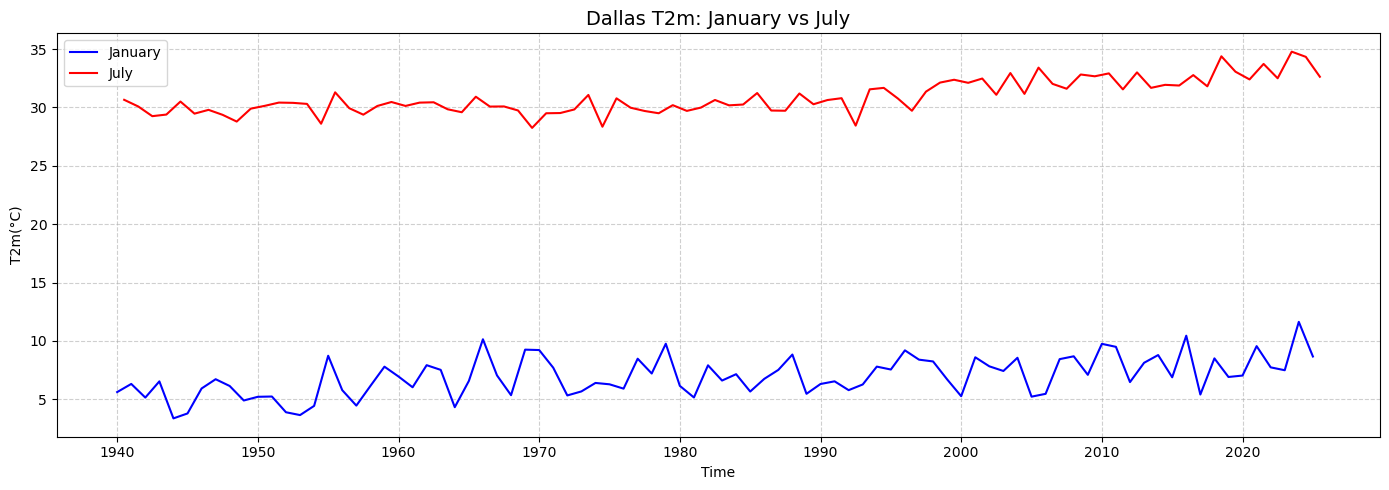

In [20]:
# Extract January (month=1) and July (month=7) anomalies
t2m_dallas_jan = t2m_dallas.sel(time=t2m_dallas_monanom['time.month'] == 1)
t2m_dallas_jul = t2m_dallas.sel(time=t2m_dallas_monanom['time.month'] == 7)

plt.figure(figsize=(14, 5))
plt.plot(t2m_dallas_jan['time'], t2m_dallas_jan, color='blue', label='January')
plt.plot(t2m_dallas_jul['time'], t2m_dallas_jul, color='red', label='July')

plt.title('Dallas T2m: January vs July', fontsize=14)
plt.xlabel('Time')
plt.ylabel('T2m(°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

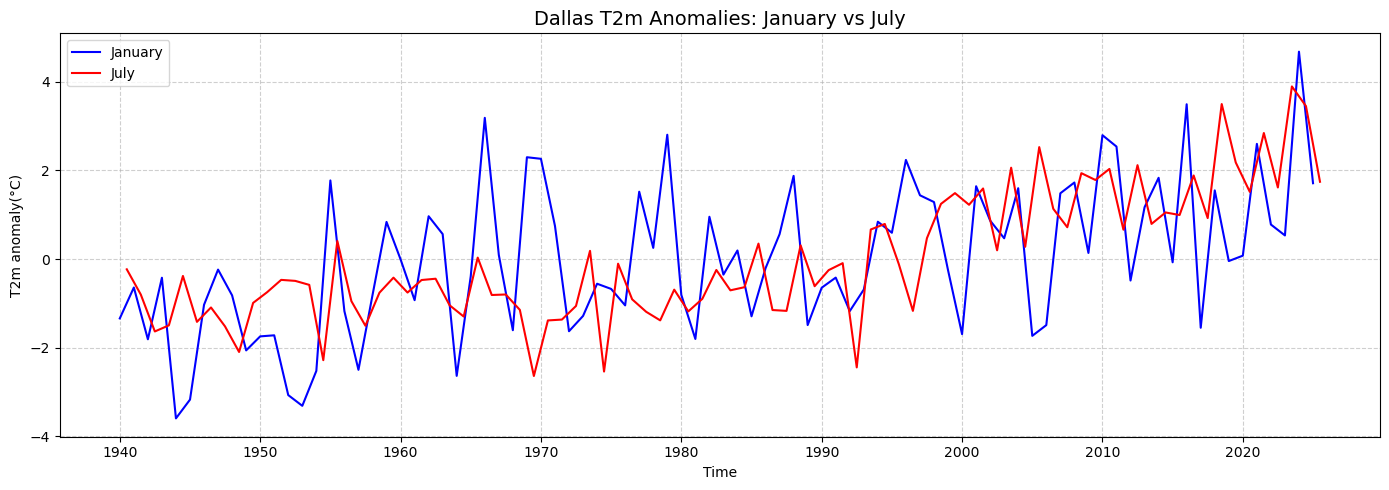

In [21]:
# Extract January (month=1) and July (month=7) anomalies
t2m_dallas_jananom = t2m_dallas_monanom.sel(time=t2m_dallas_monanom['time.month'] == 1)
t2m_dallas_julanom = t2m_dallas_monanom.sel(time=t2m_dallas_monanom['time.month'] == 7)

plt.figure(figsize=(14, 5))
plt.plot(t2m_dallas_jananom['time'], t2m_dallas_jananom, color='blue', label='January')
plt.plot(t2m_dallas_julanom['time'], t2m_dallas_julanom, color='red', label='July')

plt.title('Dallas T2m Anomalies: January vs July', fontsize=14)
plt.xlabel('Time')
plt.ylabel('T2m anomaly(°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Section 3 Pick a new place of your interest, and repeat the T2m analysis shown in Section 2
1. Look up the latitude and longitude of the place
2. Reuse and modify the code in Section 2
3. Describe the findings based on each plot
   1) Seasonal cycle (monthly climatology) of T2m
   2) Time series of T2m anomaly
   3) T2m anomalies in January vs July